## 1. Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna)

In [0]:
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt


In [0]:
#The optimal values of m and b can be actually calculated with way less effort than doing a linear regression. 
#this is just to demonstrate gradient descent


# y = mx + b
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2) * (y - ((m_current * x) + b_current))
        m_gradient += -(2) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)        
       
    return [b, m]

def run():
    points = genfromtxt("income.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    
if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 88399.03491138059
Running...
After 1000 iterations b = -9.647708875888306, m = 3.8256361905811556, error = 2166.0903089213266


## 2.Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente. Gere um plot mostrando o RSS por interação.

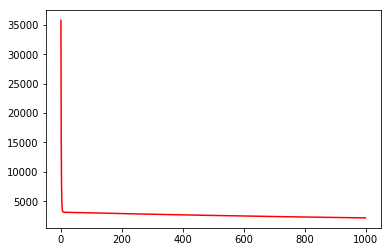

In [0]:
def modified(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    result = []
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        result.append(compute_error_for_line_given_points(b,m,points))
    return result
  
def run_rss():
    points = genfromtxt("income.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000    
    result = modified(points, initial_b, initial_m, learning_rate, num_iterations)
    return result

plt.plot(run_rss(),color="red")


##3 O que acontece com o RSS ao longo das iterações (aumenta ou diminui) se você usar 1000 iterações e um learning_rate (tamanho do passo do gradiente) de 0.001? Por que você acha que isso acontece?

###**Diminui :** 
* O tamanho do learninge_rate influência diretamente no tamanho dos passos que daremos no vertice para o ponto minimo
* Nesse caso a taxa de aprendizado é alta por consequência os passos serão cada vez mais longe do vertice

##4. Teste valores diferentes do número de iterações e learning_rate até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.

In [0]:
def run():
    points = genfromtxt("income.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 16555
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    
if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 88399.03491138059
Running...
After 16555 iterations b = -39.094306410758456, m = 5.578531993547336, error = 895.0418212351153


Com **16555** interação e com **0.0001** de learning_rate. Chegamos a um valor aproximado de **-39** e **5**
* w0 = -39.094306410758456
* w1 =  5.578531993547336

##5.O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de tolerância que é comparado ao tamanho do gradiente (como no algoritmo dos slides apresentados em sala). 

In [0]:

import time

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2) * (y - ((m_current * x) + b_current))
        m_gradient += -(2) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m,b_gradient,m_gradient]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate ):
    b = starting_b
    m = starting_m
    num_iterations = 0
    b_gradient = 1
    m_gradient = 0
    while( abs( b_gradient-m_gradient ) > 0.01):
        b, m ,b_gradient,m_gradient= step_gradient(b, m, array(points), learning_rate)   
        num_iterations+=1
    return [b, m,num_iterations]

def run():
    points = genfromtxt("income.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    inicio = time.clock()
    [b, m,num_iterations] = gradient_descent_runner(points, initial_b, initial_m, learning_rate)
    final = time.clock()
    t = final - inicio
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    print("Time" , t)
if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 88399.03491138059
Running...
After 32912 iterations b = -39.44295011811842, m = 5.59928604129897, error = 894.864501622754
Time 1.348910999999994


##6.Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?

**A questão 5 consegue w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente**

O valor de tolerância usado é **0.01**

##7. Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides). Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.

In [0]:

def gradient_descent_runner(points):
    meanX = mean(points[:,0])
    meanY = mean(points[:,1])
    dividend = 0
    divider = 0
    for i in range(len(points)):
      x = points[i, 0]
      y = points[i, 1]
      dividend += (x - meanX)*(y - meanY)
      divider += (x - meanX)**2
    new_m = dividend/divider
    new_b = meanY - (new_m*meanX)
    return [new_b, new_m]


def run():
    
    points = genfromtxt("income.csv", delimiter=",")
    print("Running...")
    inicio = time.clock()
    [b, m] = gradient_descent_runner(points)
    final = time.clock()
    t = final - inicio 
    print("b = {}, m = {}, error = {}".format(b, m, compute_error_for_line_given_points(b, m, points)))
    print("Time",t)


if __name__ == '__main__':
    run()


Running...
b = -39.446256679096194, m = 5.59948287411992, error = 894.8644859701869
Time 0.00013299999999816237


###Como podemos observar o Time da Questão 6 foi *1.348910999999994* e na Questão 7 foi apenas *0.00013299999999816237* Uma diferença consideravelmente alta